**классификатор изображений (RAW)**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
# !pip3 install scikit-image

In [2]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

## исходные данные

In [3]:
from skimage.data import lfw_subset

images = lfw_subset()
target = np.array([1]*100+[0]*100) # Label images (100 faces and 100 non-faces)
images.shape

(200, 25, 25)

In [4]:
im_w,im_h = images.shape[1:]
im_w,im_h

(25, 25)

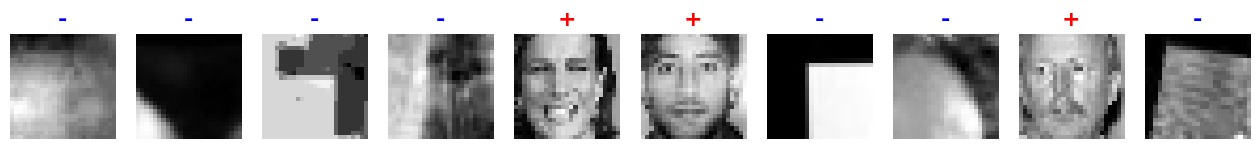

In [5]:
n_show = 10

plt.figure(figsize=(16,4))
for n,i in enumerate(rng.permutation(len(images))[:n_show],start=1):
    img = images[i]
    t,c = ('+','r') if target[i] else ('-','b')
    plt.subplot(1,n_show,n)
    plt.axis(False)
    plt.title(t,color=c,fontdict = {'fontsize':16,'fontweight':'bold'})    
    plt.imshow(img,cmap='gray')

In [6]:
n,h,w = images.shape
X = images.reshape(n,w*h)
X.shape

(200, 625)

## обучение модели

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=.33) # , stratify=target)
X_train.shape, X_test.shape

((134, 625), (66, 625))

In [8]:
del X
del target

In [9]:
%%time

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(X_train, y_train)

CPU times: user 381 ms, sys: 3.68 ms, total: 385 ms
Wall time: 385 ms


## оценка результатов

In [10]:
from sklearn.metrics import classification_report

o_test = model.predict(X_test)
print(classification_report(y_test,o_test) )

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.94      0.97        36

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



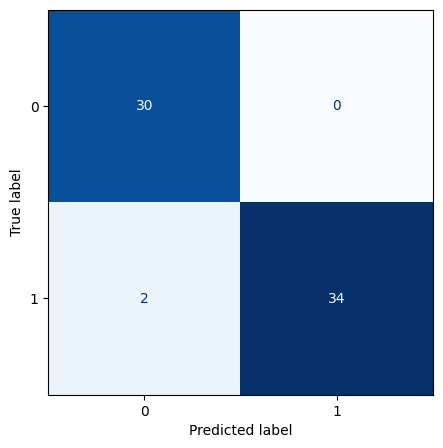

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize=(5,5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,o_test), 
    #display_labels=class_names,
)

disp.plot(ax=ax, include_values=True, cmap='Blues', colorbar=False,)

plt.show()

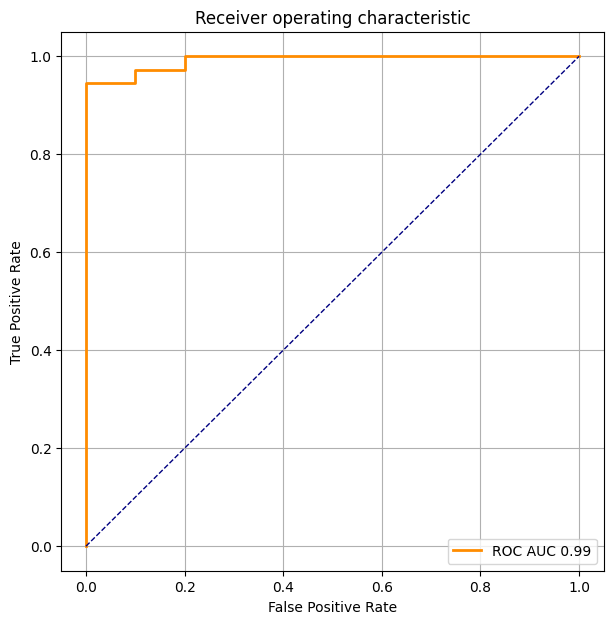

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

s = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, s )
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC AUC %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()